In [1]:
#import library yang akan digunakan
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#inisiasi kelas particle, mengurutkan 2 posisi antara -50 dan 50
class Particle():
    def __init__(self):
        self.position = np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*50, (-1)**(bool(random.getrandbits(1))) * random.random()*50])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0])

#cetak posisi aktual dan nilai individu terbaik
    def __str__(self):
        print("Posisi ", self.position, " pbest : ", self.pbest_position)
    
    def move(self):
        self.position = self.position + self.velocity

In [3]:
#inisiasi kelas search space
class Space():

    def __init__(self, target, target_error, n_particles):
        self.target = target
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*50, random.random()*50])
    
    #melewati semua partikel
    def print_particles(self):
        for particle in self.particles:
            particle.__str__()

   #menghitung nilai fitness dari posisi partikel (x^2 + y^2 +1)
    def fitness(self, particle): 
        return particle.position[0] ** 2 + particle.position[1] ** 2 + 1

    #membandingkan posisi individu terbaik
    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            
    #membandingkan posisi global terbaik
    def set_gbest(self):
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position

    #menghitung kecepatan vektor baru untuk setiap partikel di setiap dimensi
    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + \
                            (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()

In [8]:
W = 0.5
c1 = 0.8 #untuk perkalian nilai random dari move_particles
c2 = 0.9 

n_iterations = int(input("Jumlah iterasi: "))
target_error = float(input("target error: "))
n_particles = int(input("Jumlah partikel: "))

Posisi  [ -8.37734896 -20.56370396]  pbest :  [ -8.37734896 -20.56370396]
Posisi  [-40.93927846 -29.00832565]  pbest :  [-40.93927846 -29.00832565]
Posisi  [-25.58478444  10.46344089]  pbest :  [-25.58478444  10.46344089]
Posisi  [-35.18946243  14.16575449]  pbest :  [-35.18946243  14.16575449]
Posisi  [20.13930472 -0.69329023]  pbest :  [20.13930472 -0.69329023]
Posisi  [ 41.73492206 -40.57823236]  pbest :  [ 41.73492206 -40.57823236]
Posisi  [-5.2352818   2.40838674]  pbest :  [-5.2352818   2.40838674]
Posisi  [-27.48308564 -23.45891841]  pbest :  [-27.48308564 -23.45891841]
Posisi  [28.58016499 44.47907355]  pbest :  [28.58016499 44.47907355]
Posisi  [-26.71373587 -34.90765687]  pbest :  [-26.71373587 -34.90765687]
Posisi  [-34.62782093  11.33315508]  pbest :  [-34.62782093  11.33315508]
Posisi  [-38.8741899   15.70531346]  pbest :  [-38.8741899   15.70531346]
Posisi  [-25.23822493  -8.06579333]  pbest :  [-25.23822493  -8.06579333]
Posisi  [38.10066642 25.98594705]  pbest :  [38.10

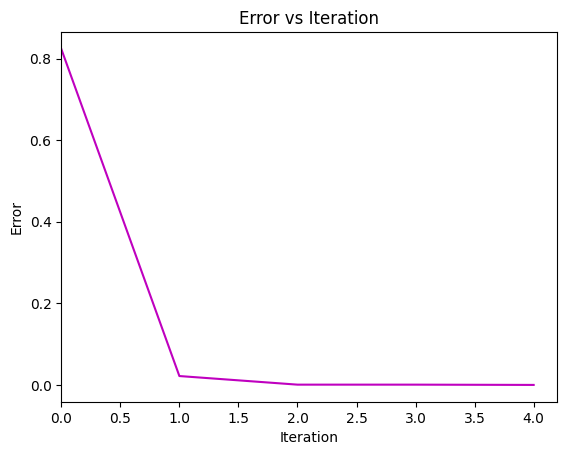

In [9]:
#main loop
#target space 1 dari f(x,y) = 1
search_space = Space(1, target_error, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particles()

iteration = 0
error=[]
while(iteration < n_iterations):
    search_space.set_pbest()    
    search_space.set_gbest()
    error.append(abs(search_space.gbest_value - search_space.target)) #menyimpan error
    if(abs(search_space.gbest_value - search_space.target) <= search_space.target_error):
        break

    search_space.move_particles()
    iteration += 1
    
print("Solusi Terbaik (Best Solution): ", search_space.gbest_position, " dalam jumlah iterasi: ", iteration)

#plot kurva error vs iterasi cetak
plt.plot(error, c='m')
plt.title('Error vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.xlim(0)
plt.show()